<a href="https://colab.research.google.com/github/Tharick15/Python-Studies/blob/main/Estudos_python_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudos Python 4 


Fazer a importação do arquivo disponível em https://raw.githubusercontent.com/assisarthur/puc/main/heart_2020_cleaned.csv. A base de dados traz informações de saúde de algumas pessoas.

Colunas da base de dados:

* HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
* BMI: Body Mass Index (BMI)
* Smoking: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
* AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
* Stroke: (Ever told) (you had) a stroke?
* PhysicalHealth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30
* MentalHealth: Thinking about your mental health, for how many days during the past 30 days was your mental health not good?
* DiffWalking: Do you have serious difficulty walking or climbing stairs?
* Sex: Are you male or female?
* AgeCategory: Fourteen-level age category
* Race: Imputed race/ethnicity value
* Diabetic: (Ever told) (you had) diabetes?
* PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
* GenHealth: Would you say that in general your health is...
* SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
* Asthma: (Ever told) (you had) asthma?
* KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
* SkinCancer: (Ever told) (you had) skin cancer?

In [ ]:
#Ralizando a instalação da biblioteca pandas
!pip install -U pandas

In [ ]:
#Realizando a importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/assisarthur/puc/main/heart_2020_cleaned.csv",
                 sep=",", comment="#")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


1) Qual o percentual de homens e mulheres na base?


In [ ]:
percent_male = (len(df[df.Sex == "Male"])/len(df))*100
percent_female = (len(df[df.Sex == "Female"])/len(df))*100
print(f"O percentual de homens é de {percent_male}% e o percentual de mulheres é de {percent_female}%")

O percentual de homens é de 47.52732219077846% e o percentual de mulheres é de 52.47267780922154%


2) Informar quantas pessoas tiveram alguma doença e/ou lesão física há mais de 5 dias.



In [ ]:
x = len(df[(df.PhysicalHealth > 5)])
print(f"A quantidade de pessoas que tiveram alguma doença e/ou lesão física há mais de 5 dias é {x}")

A quantidade de pessoas que tiveram alguma doença e/ou lesão física há mais de 5 dias é 47146


3) Calcular a mediana do indíce de massa corporal (BMI).

In [ ]:
mediana_massa = df.BMI.median()
print(f"A mediana da massa corporal é {mediana_massa}")

A mediana da massa corporal é 27.34


4) Os percentis de 10 e 90% do tempo de sono.

In [ ]:
df10 = df.loc[:,"SleepTime"].quantile(q=0.1)
df90 = df.loc[:,"SleepTime"].quantile(q=0.9)
print(f"o percentil de 10% do tempo de sono é {df10} e o percentil de 90% é {df90}")

o percentil de 10% do tempo de sono é 6.0 e o percentil de 90% é 8.0


5) Determinar a faixa etária com mais ocorrência de câncer de pele.



In [ ]:
dfskin = df.AgeCategory.loc[(df.SkinCancer=="Yes")].max()
print(f"Faixa etária com mais ocorrência de câncer de pele: {dfskin}")

Faixa etária com mais ocorrência de câncer de pele: 80 or older


6) Definir por sexo a quantidade de pessoas com e sem problemas cardíacos.


In [ ]:
male_card = len(df[(df.Sex == "Male") & (df.HeartDisease=="Yes")])
female_card = len(df[(df.Sex == "Female") & (df.HeartDisease=="Yes")])
male_ncard = len(df[(df.Sex == "Male") & (df.HeartDisease=="No")])
female_ncard = len(df[(df.Sex == "Female") & (df.HeartDisease=="No")])

print(f"Homens com problemas cardiacos: {male_card}\nMulheres com problemas cardiacos: {female_card}\n")
print(f"Homens sem problemas cardiacos: {male_ncard}\nMulheres sem problemas cardiacos: {female_ncard}\n")

Homens com problemas cardiacos: 16139
Mulheres com problemas cardiacos: 11234

Homens sem problemas cardiacos: 135851
Mulheres sem problemas cardiacos: 156571



7) Associe doença cardíaca com alguma outra doença na base.

In [ ]:
#Fazendo a relação entre doenças cardiacas e infarto
relacao = pd.crosstab(df.HeartDisease,df.Stroke)
relacao

Stroke,No,Yes
HeartDisease,,
No,284742,7680
Yes,22984,4389


8) Filtrar as pessoas que possuem mais de 3 tipos de doenças.

In [ ]:
df_doenca = df.assign(qtd_doencas = df.loc[:,["HeartDisease","Stroke","DiffWalking",
                                      "Diabetic","Asthma","KidneyDisease",
                                      "SkinCancer"]].replace(["Yes","No"],[1,0]).sum(axis = 1))
df_doenca[(df_doenca.qtd_doencas > 3)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,qtd_doencas
35,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes,4
141,Yes,29.29,Yes,No,No,0.0,0.0,Yes,Female,70-74,Other,No,Yes,Very good,5.0,Yes,No,Yes,4
142,Yes,31.48,No,Yes,Yes,20.0,20.0,Yes,Male,65-69,Black,No,No,Fair,7.0,Yes,No,No,4
165,Yes,28.89,Yes,No,No,3.0,30.0,Yes,Female,75-79,White,Yes,No,Fair,8.0,Yes,No,Yes,4
184,Yes,25.80,Yes,No,No,7.0,0.0,Yes,Male,80 or older,White,No,No,Fair,8.0,Yes,Yes,Yes,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319619,Yes,39.31,No,No,Yes,3.0,0.0,Yes,Female,65-69,Hispanic,No,No,Fair,4.0,Yes,Yes,No,5
319620,Yes,27.64,No,No,Yes,1.0,0.0,Yes,Male,50-54,Hispanic,Yes,Yes,Good,6.0,No,Yes,No,4
319708,Yes,24.41,Yes,No,No,15.0,0.0,Yes,Male,60-64,Hispanic,No,Yes,Fair,5.0,Yes,Yes,No,4
319721,Yes,39.30,No,No,No,30.0,30.0,Yes,Female,60-64,Hispanic,Yes,No,Fair,8.0,Yes,Yes,No,4


9) Renomeie os nomes das colunas para a tradução em português.

In [ ]:
df.columns = ["DoencaCardiaca","IMC","Fumante","ConsomeAlcool","Infarto","Saude_Fisica","Saude_mental","Dificuldade_Andar","Sexo","Faixa_etaria", "Cor","Diabetico","Atividade_Fisica","Saude_geral","Tempo_sono","Asma","Doencas_rim","Cancer_de_pele"]
df

,DoencaCardiaca,IMC,Fumante,ConsomeAlcool,Infarto,Saude_Fisica,Saude_mental,Dificuldade_Andar,Sexo,Faixa_etaria,Cor,Diabetico,Atividade_Fisica,Saude_geral,Tempo_sono,Asma,Doencas_rim,Cancer_de_pele
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


10) Salvar uma amostra da base em parquet e em csv e comparar o tamanho dos arquivos salvos.

In [ ]:
import os
amostra_df = df.head()
amostra_df.to_parquet("Dados.parquet")
amostra_df.to_csv("Dados.csv" , index = False)

tamanho_csv = os.path.getsize("Dados.csv") 
tamanho_parquet = os.path.getsize("Dados.parquet") 
print(f"Tamanho do arquivo csv: {tamanho_csv} bytes\nTamanho do arquivo parquet: {tamanho_parquet} bytes")

Tamanho do arquivo csv: 593 bytes
Tamanho do arquivo parquet: 12065 bytes


11) Gerar 2 novas colunas, IdadeMinima e IdadeMaxima, baseando-se na faixa etária (AgeCategory).

In [ ]:
def idade_min(idade_min):
  if "-" in idade_min:
    idade_min = idade_min.split("-")[0]
  else:
    idade_min = idade_min.split(" or ")[0]
  return idade_min

def idade_max(idade_max):
  if "-" in idade_max:
    idade_max = idade_max.split("-")[1]
  else:
    idade_max = idade_max.split(" or ")[1]
  return idade_max

df = df.assign(Idade_min = df.Faixa_etaria.apply(idade_min),Idade_max = df.Faixa_etaria.apply(idade_max))
df

,DoencaCardiaca,IMC,Fumante,ConsomeAlcool,Infarto,Saude_Fisica,Saude_mental,Dificuldade_Andar,Sexo,Faixa_etaria,Cor,Diabetico,Atividade_Fisica,Saude_geral,Tempo_sono,Asma,Doencas_rim,Cancer_de_pele,Idade_min,Idade_max
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,55,59
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,80,older
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,65,69
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,75,79
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,40,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No,60,64
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No,35,39
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No,45,49
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No,25,29


12) Plotar um gráfico de barras apresentando o percentual de pessoas por faixa etária com dificuldade de andar.

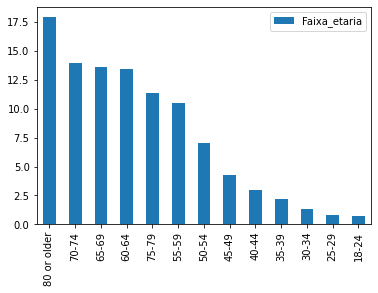

In [ ]:
df_diff = pd.DataFrame(df.Faixa_etaria.loc[(df.Dificuldade_Andar == "Yes")].value_counts()/sum(df.Faixa_etaria.loc[(df.Dificuldade_Andar == "Yes")].value_counts())*100)
df_diff.plot.bar()